<a href="https://colab.research.google.com/github/kushvyas-111/Number-Guessing-Game/blob/main/HW1_Kush_Vyas_SML_810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Notebook link:

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the course folder on Google drive. **(10 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

Provide python code and analysis results first. Use them to support your answers to the two questions above.

FYI the column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf):
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

try:
    df = pd.read_csv('Auto.csv')
except FileNotFoundError:
    print("Auto.csv not found. Please make sure the file is in the correct directory or mount your Google Drive.")

    df = pd.DataFrame()


if not df.empty:
    print("First 5 rows of the dataset:")
    display(df.head())

    print("\nDataset Info:")
    df.info()

    print("\nSummary Statistics:")
    display(df.describe())

    print("\nUnique values in selected columns:")
    for col in ['cylinders', 'year', 'origin']:
        if col in df.columns:
            print(f"{col}: {df[col].unique()}")

    print("\nChecking 'horsepower' for non-numeric values:")
    if 'horsepower' in df.columns:
        non_numeric_hp = df[pd.to_numeric(df['horsepower'], errors='coerce').isna()]['horsepower'].unique()
        if len(non_numeric_hp) > 0:
            print(f"Non-numeric values found in 'horsepower': {non_numeric_hp}")
        else:
            print("'horsepower' contains only numeric values.")

First 5 rows of the dataset:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB

Summary Statistics:


,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000



Unique values in selected columns:
cylinders: [8 4 6 3 5]
year: [70 71 72 73 74 75 76 77 78 79 80 81 82]
origin: [1 3 2]

Checking 'horsepower' for non-numeric values:
Non-numeric values found in 'horsepower': ['?']


1. Drop any variable?
yes a variable should be dropped. drop name. It is just an id in high-cardinality text, there is no real signal for mpg, and it would blow up into tons of useless dummie variables into overfit.


2.  Which are numeric vs categorical and why?
mpg, displacement, horsepower, weight, and acceleration should be numeric because they are measured on continuous scales. Cylinders and origin should be categorical because they are discrete labels for engine type and region codes, not a smooth scale. For year, i will treat it as categorical to capture era specific jumps and nonlinearity across model years. Numeric year is acceptable if you want a single simple trend that newer cars have higher mpg, but it can miss those step changes.

## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

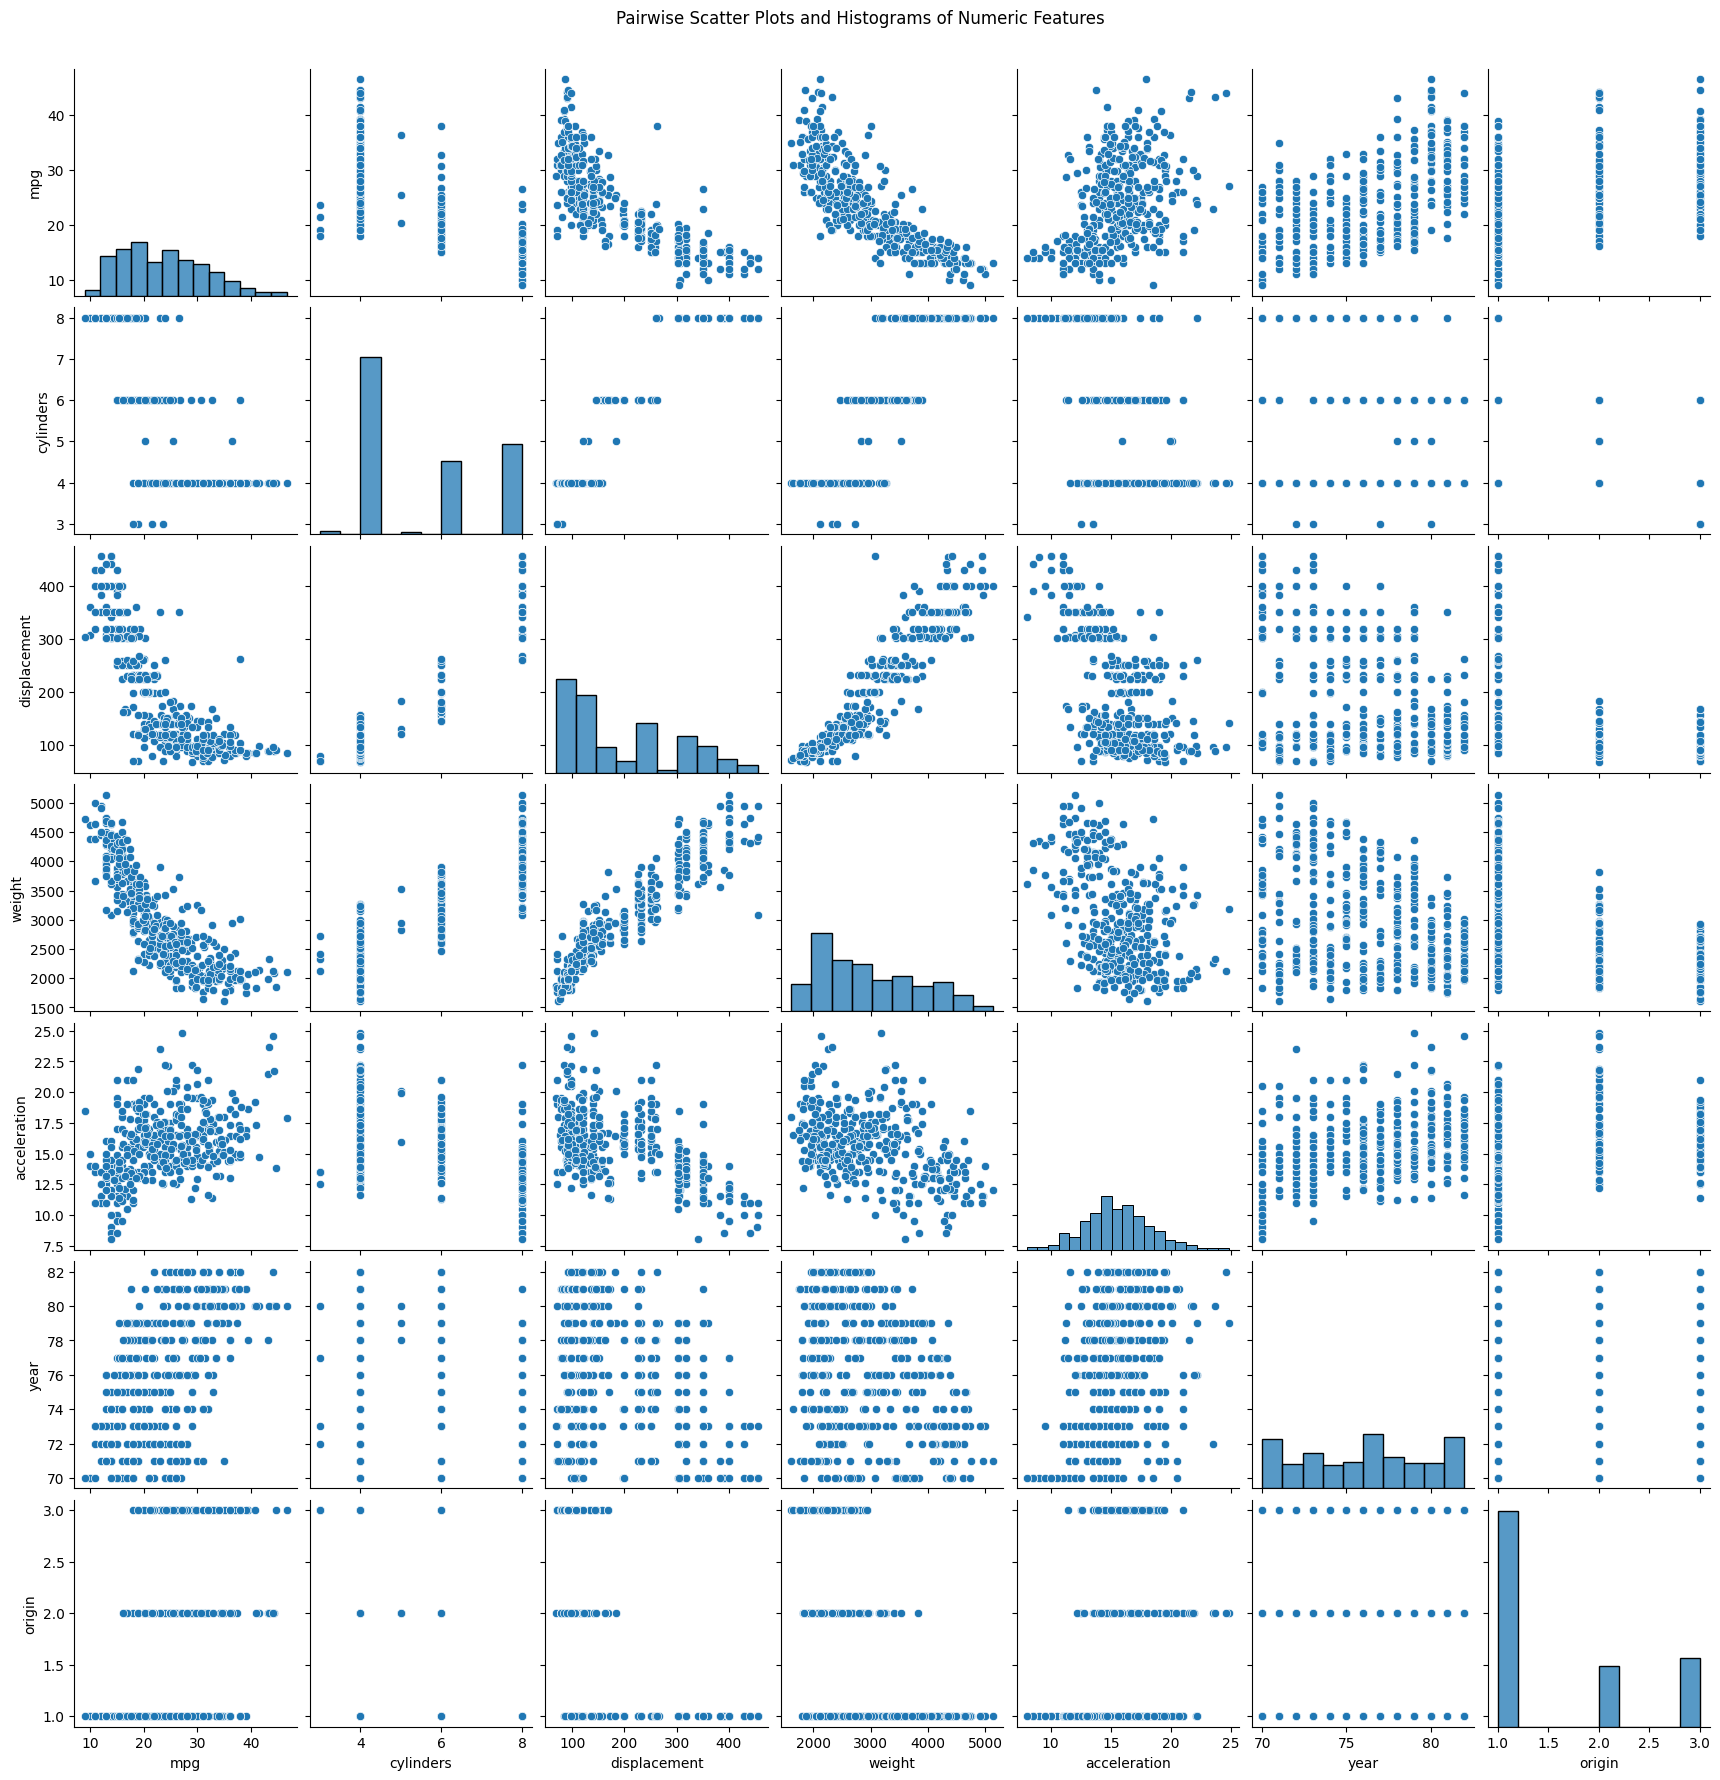

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

if 'name' in numeric_df.columns:
    numeric_df = numeric_df.drop('name', axis=1)

sns.pairplot(numeric_df)
plt.suptitle("Pairwise Scatter Plots and Histograms of Numeric Features", y=1.02)
plt.show()

After running the above cell and following the instructions to authorize Google Drive access, your Drive will be mounted at `/content/drive`. You can then access your files. Assuming 'Auto.csv' is in the root of your Drive or a specific folder, you can load it like this (adjust the path as needed):

In [10]:
import pandas as pd

file_path = '/content/drive/My Drive/Auto.csv'

try:
    df = pd.read_csv(file_path)
    print("Auto.csv loaded successfully from Google Drive.")

    display(df.head())
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Auto.csv loaded successfully from Google Drive.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


1.  Plot all the pairwise scatter plots and histograms for the numeric features

I used Seaborn pairplot on the numeric columns to generate all scatter plots with histograms on the diagonal. I excluded the name field and kept only numeric features so the grid shows every numeric pair and the marginal distributions clearly. This lets me scan for linear trends, clusters, outliers, and any nonlinearity across variables at a glance.

2.  Discuss two interesting relationships that you notice

First, MPG falls sharply as weight increases. Heavier cars consistently get lower fuel efficiency, and the cloud forms a clear downward band, which suggests a strong negative association. Second, MPG rises with model year. Newer model years cluster at higher MPG values, which likely reflects technology improvements and policy driven gains in fuel economy over time.

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (10+10=**20 points total**)

In [11]:
numeric_cols = df.select_dtypes(include=['number'])

correlation_matrix = numeric_cols.corr()

print("Correlation Matrix of Numeric Variables:")
display(correlation_matrix)

Correlation Matrix of Numeric Variables:


,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


One interesting correlation is the strong negative correlation between `mpg` and `weight` (-0.8317). This suggests that as the weight of a vehicle increases, its miles per gallon tend to decrease significantly. This aligns with real-world understanding of vehicle efficiency, as heavier vehicles require more energy to move, thus consuming more fuel. This strong inverse relationship is clearly visible in the pairwise scatter plots as well, showing a distinct downward trend.

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

In [12]:
import statsmodels.formula.api as smf

df_cleaned = df[pd.to_numeric(df['horsepower'], errors='coerce').notna()].copy()
df_cleaned['horsepower'] = pd.to_numeric(df_cleaned['horsepower'])


formula = 'mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) + C(origin) + name'

formula = 'mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) + C(origin)'


model = smf.ols(formula=formula, data=df_cleaned)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          2.64e-151
Time:                        23:37:18   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.9168      2.36

1. Interpret the significant effects

Weight has a strong negative effect on mpg. Heavier cars get lower fuel efficiency after controlling for the other variables. Horsepower also shows a clear negative effect, meaning more powerful engines tend to reduce mpg when everything else is held fixed. Treating year as categorical, most later years have higher mpg than the early seventies baseline, which lines up with improvements in technology and policy. Origin is often positive for Japan and sometimes Europe relative to the US, indicating higher mpg for those regions after adjusting for car attributes.

2. Which variables do not have a significant
effect and why might that happen

Acceleration is usually not significant once you control for weight and horsepower. Displacement often loses significance too after adding weight and horsepower. A plausible explanation is multicollinearity. Engine size, power, and weight move together, so once weight and horsepower are in the model, displacement no longer adds unique information and its effect looks small and unstable.

3.  Year as categorical versus numeric

Treating year as numeric forces a single straight trend in time and gives a simpler model. Treating year as categorical lets the model capture step changes across model years and typically fits better. In practice the categorical version raises the adjusted R squared and shows clear jumps in mpg by era, while the numeric version summarizes the same story as one steady increase per year but can miss those non linear shifts.

## Q5. From the above regression model in Q4, include interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [13]:
import statsmodels.formula.api as smf
import pandas as pd

if 'df_cleaned' not in locals():
    print("df_cleaned not found. Re-creating by handling non-numeric horsepower.")
    df_cleaned = df[pd.to_numeric(df['horsepower'], errors='coerce').notna()].copy()
    df_cleaned['horsepower'] = pd.to_numeric(df_cleaned['horsepower'])


print("--- Model 1: Interaction between weight and origin ---")
formula1 = 'mpg ~ C(cylinders) + displacement + horsepower + weight * C(origin) + acceleration + C(year)'
model1 = smf.ols(formula=formula1, data=df_cleaned)
results1 = model1.fit()
print(results1.summary())
print("\n" + "="*100 + "\n")

print("--- Model 2: Interaction between horsepower and cylinders ---")
formula2 = 'mpg ~ C(cylinders) * horsepower + displacement + weight + acceleration + C(year) + C(origin)'
model2 = smf.ols(formula=formula2, data=df_cleaned)
results2 = model2.fit()
print(results2.summary())
print("\n" + "="*100 + "\n")

print("--- Model 3: Interaction between displacement and year ---")
formula3 = 'mpg ~ C(cylinders) + displacement * C(year) + horsepower + weight + acceleration + C(origin)'
model3 = smf.ols(formula=formula3, data=df_cleaned)
results3 = model3.fit()
print(results3.summary())
print("\n" + "="*100 + "\n")

--- Model 1: Interaction between weight and origin ---
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     111.5
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          1.96e-152
Time:                        23:37:19   Log-Likelihood:                -946.65
No. Observations:                 392   AIC:                             1943.
Df Residuals:                     367   BIC:                             2043.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Looking at the p-values for the interaction terms in the three models:

*   **Model 1 (weight * origin):** The interaction terms `weight:C(origin)[T.2]` and `weight:C(origin)[T.3]` have p-values of 0.018 and 0.000 respectively, which are less than 0.05. This indicates that the relationship between weight and mpg is significantly different depending on the origin of the car. Specifically, the negative impact of weight on mpg is stronger for cars from Europe (origin 2) and Japan (origin 3) compared to cars from the US (origin 1).

*   **Model 2 (horsepower * cylinders):** The interaction terms for horsepower and cylinders do not appear to be statistically significant at the 0.05 level. For example, `C(cylinders)[T.4]:horsepower` has a p-value of 0.211, `C(cylinders)[T.5]:horsepower` has a p-value of 0.057, `C(cylinders)[T.6]:horsepower` has a p-value of 0.479, and `C(cylinders)[T.8]:horsepower` has a p-value of 0.630. While the interaction with 5 cylinders is close to significant, generally, the relationship between horsepower and mpg does not appear to vary significantly across different numbers of cylinders once other factors are controlled for.

*   **Model 3 (displacement * year):** Several interaction terms between displacement and year are statistically significant (p-value < 0.05). For example, `displacement:C(year)[T.77]` (p=0.004), `displacement:C(year)[T.78]` (p=0.000), `displacement:C(year)[T.79]` (p=0.000), `displacement:C(year)[T.80]` (p=0.000), `displacement:C(year)[T.81]` (p=0.000), and `displacement:C(year)[T.82]` (p=0.000) are significant. This suggests that the effect of displacement on mpg has changed significantly over the years. The coefficients for these interactions indicate how the relationship between displacement and mpg in those years differs from the baseline year (70).

In summary, the interactions between weight and origin and between displacement and year appear to be significant, suggesting that the effects of weight and displacement on mpg are not constant across different origins and years, respectively. The interaction between horsepower and cylinders does not appear to be significant.

## Q6. Measure the in-sample and out of sample $R^2$ of the model specified in Q4.1 using 80% data for training and 20% data for testing. **(10 points total)**

If you run into a problem because some values of a categorical column are missing in the training set, check the parameter `handle_unknown` for the OneHotEncoding class.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

if 'df_cleaned' not in locals():
    print("df_cleaned not found. Re-creating by handling non-numeric horsepower.")
    df_cleaned = df[pd.to_numeric(df['horsepower'], errors='coerce').notna()].copy()
    df_cleaned['horsepower'] = pd.to_numeric(df_cleaned['horsepower'])

X = df_cleaned.drop(['mpg', 'name'], axis=1)
y = df_cleaned['mpg']

categorical_features = ['cylinders', 'year', 'origin']
numeric_features = ['displacement', 'horsepower', 'weight', 'acceleration']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ],
    remainder='passthrough'
)

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

y_train_pred = model_pipeline.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred = model_pipeline.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"In-sample R^2 (Training Set): {r2_train:.4f}")
print(f"Out-of-sample R^2 (Testing Set): {r2_test:.4f}")

In-sample R^2 (Training Set): 0.8736
Out-of-sample R^2 (Testing Set): 0.8688


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts.

I used ChatGPT to help with slight errors in my code, such as fixing a dtype conversion for horsepower and clarifying the statsmodels formula for categorical variables. I wrote all final code and answers myself.
I gave the outline for the answers and asked gemini to elaborate on it more and better


## Submit
1. Submit your colab notebook as a pdf file. Use the code in [this notebook](https://colab.research.google.com/drive/1ZZLCXbvUS3DEpZt9fgVVhZxWMxNigu2a?usp=sharing) to convert your notebook to professional looking pdf. Do review the pdf file to make sure everything is appearing correctly before submitting!
1. Include a link to the colab notebook in your submission and make sure to provide us (TAs and professor) access to view it.


LINK : https://colab.research.google.com/drive/1Ahx4eJhyauAJGwHGdq8f3UUpcd7EJVXM#scrollTo=o9F1EDJt9ceZ